In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/telecom_churn.csv")

# Explore the dataset
print(data.head())  # Display the first few rows
print(data.info())   # Summary of the dataset
print(data.describe())  # Statistical summary
print(data.isnull().sum())  # Check for missing values

   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           01/01/2020               4            124962          44   
1   125926           01/01/2020               2            130556          62   
2   423976           01/01/2020               0            148828          49   
3   522841           01/01/2020               1             38722          80   
4   740247           01/01/2020               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1   

In [14]:
# Convert date_of_registration to datetime
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])

# Check for inconsistencies
print("Negative values for calls_made:", (data['calls_made'] < 0).sum())
print("Negative values for sms_sent:", (data['sms_sent'] < 0).sum())
print("Negative values for data_used:", (data['data_used'] < 0).sum())


Negative values for calls_made: 0
Negative values for sms_sent: 0
Negative values for data_used: 0


In [3]:
import numpy as np

# Replace negative values with NaN
data['calls_made'] = data['calls_made'].apply(lambda x: np.nan if x < 0 else x)
data['sms_sent'] = data['sms_sent'].apply(lambda x: np.nan if x < 0 else x)
data['data_used'] = data['data_used'].apply(lambda x: np.nan if x < 0 else x)

# Check for NaN values
print("NaN values for calls_made:", data['calls_made'].isnull().sum())
print("NaN values for sms_sent:", data['sms_sent'].isnull().sum())
print("NaN values for data_used:", data['data_used'].isnull().sum())
mean_calls_made = data['calls_made'].mean()
mean_sms_sent = data['sms_sent'].mean()
mean_data_used = data['data_used'].mean()

data['calls_made'].fillna(mean_calls_made, inplace=True)
data['sms_sent'].fillna(mean_sms_sent, inplace=True)
data['data_used'].fillna(mean_data_used, inplace=True)

# Verify NaN values have been handled
print("NaN values for calls_made:", data['calls_made'].isnull().sum())
print("NaN values for sms_sent:", data['sms_sent'].isnull().sum())
print("NaN values for data_used:", data['data_used'].isnull().sum())



NaN values for calls_made: 6713
NaN values for sms_sent: 7375
NaN values for data_used: 6050
NaN values for calls_made: 0
NaN values for sms_sent: 0
NaN values for data_used: 0


         customer_id            age        pincode  \
count  243553.000000  243553.000000  243553.000000   
mean   121777.000000      46.077609  549501.270541   
min         1.000000      18.000000  100006.000000   
25%     60889.000000      32.000000  324586.000000   
50%    121777.000000      46.000000  548112.000000   
75%    182665.000000      60.000000  774994.000000   
max    243553.000000      74.000000  999987.000000   
std     70307.839393      16.444029  259808.860574   

                date_of_registration  num_dependents  estimated_salary  \
count                         243553   243553.000000     243553.000000   
mean   2021-09-01 00:00:00.354748416        1.997500      85021.137839   
min              2020-01-01 00:00:00        0.000000      20000.000000   
25%              2020-10-31 00:00:00        1.000000      52585.000000   
50%              2021-09-01 00:00:00        2.000000      84990.000000   
75%              2022-07-03 00:00:00        3.000000     117488.00000

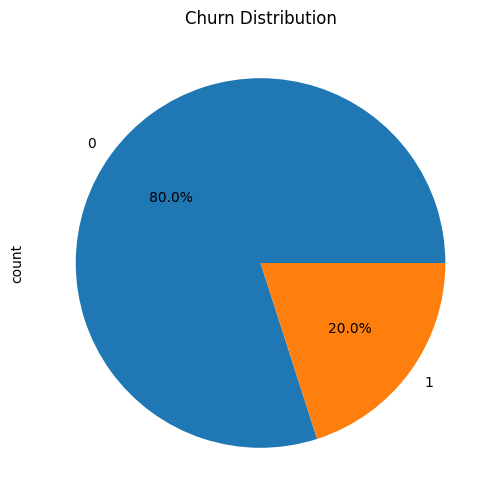

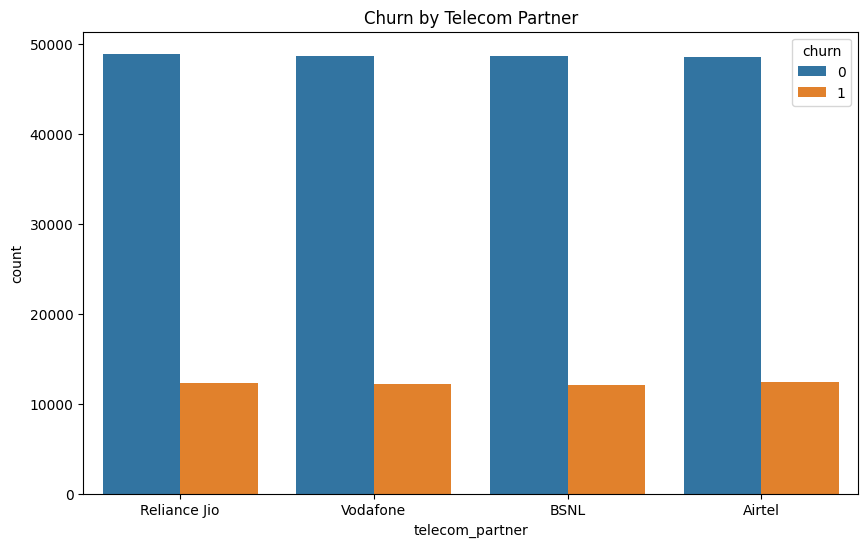

In [4]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import seaborn as sns  # Import seaborn for more advanced visualization

# Summary statistics for numerical features
print(data.describe())

# Visualize churn distribution
plt.figure(figsize=(6, 6))
data['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

# Bar plot for telecom_partner and churn
plt.figure(figsize=(10, 6))
sns.countplot(x='telecom_partner', hue='churn', data=data)
plt.title('Churn by Telecom Partner')
plt.show()



<Figure size 1000x800 with 0 Axes>

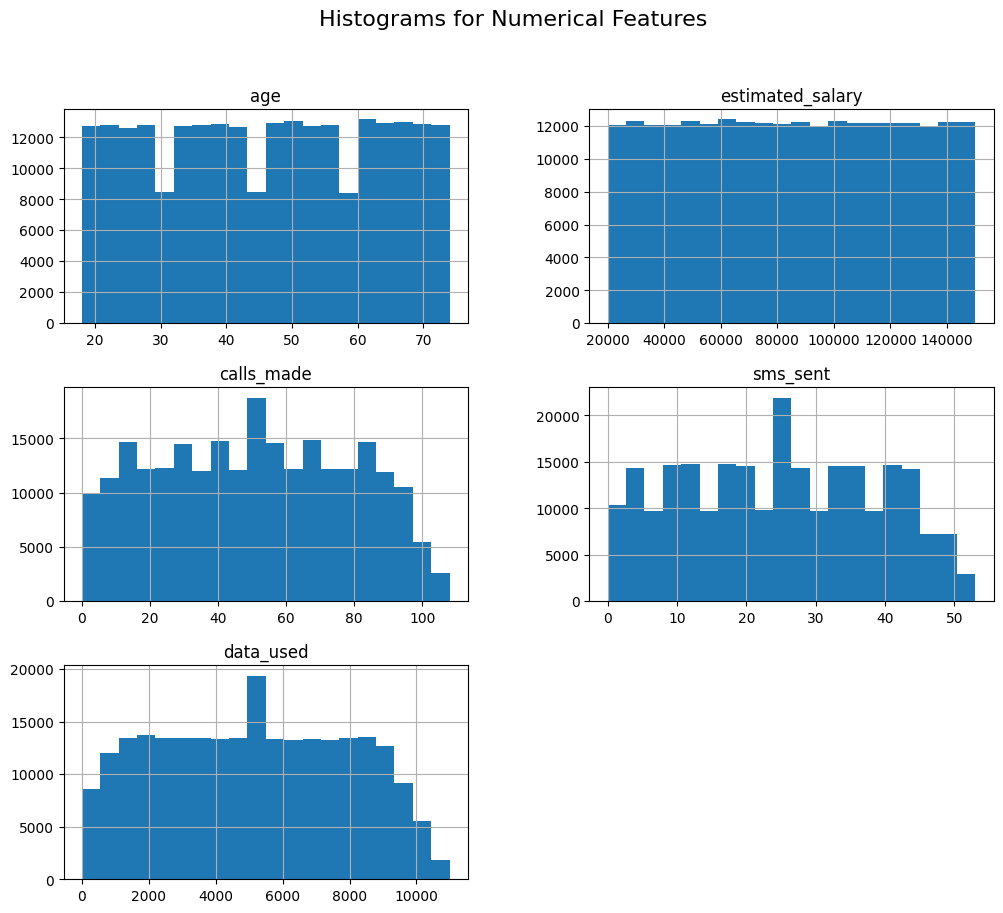

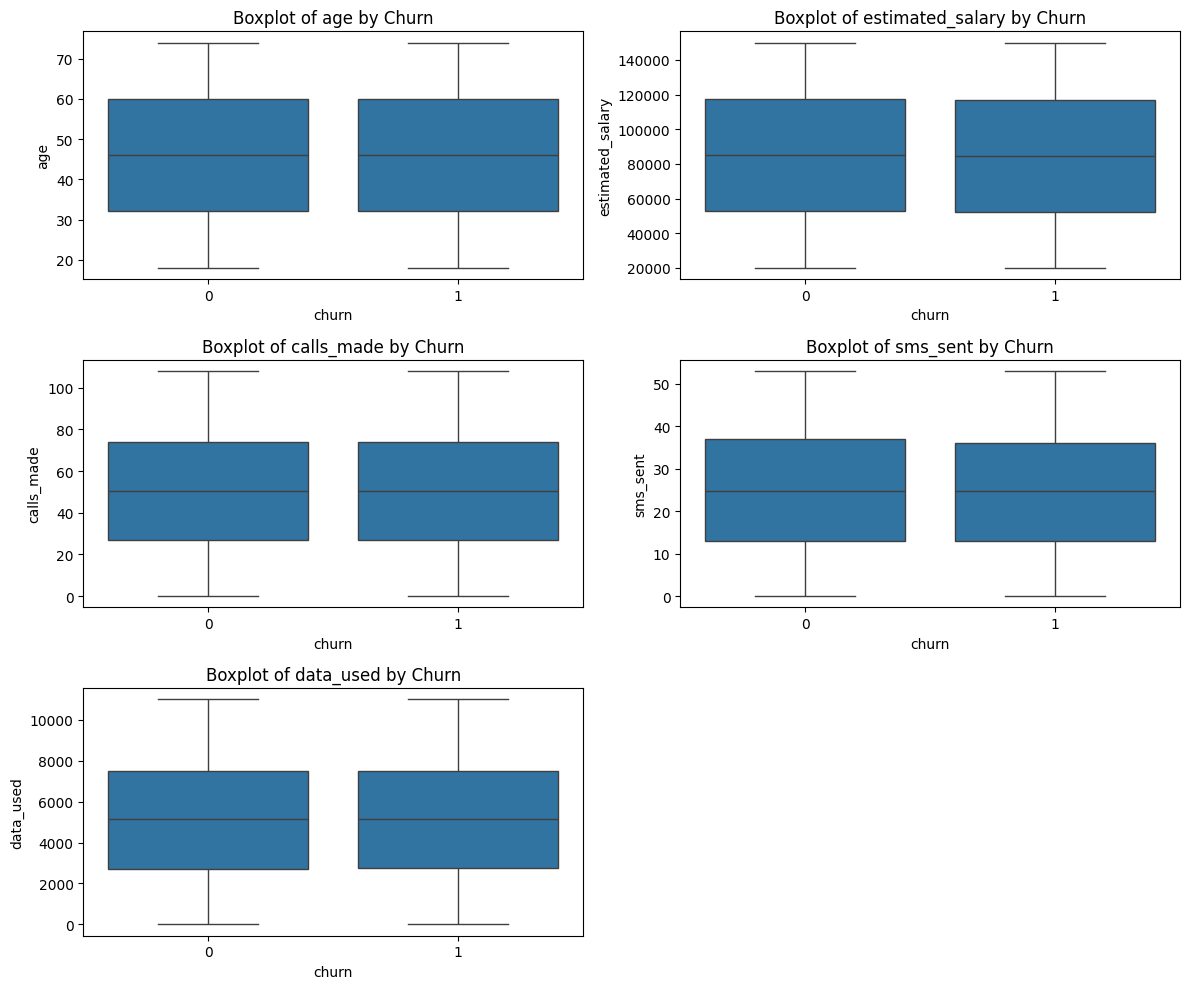

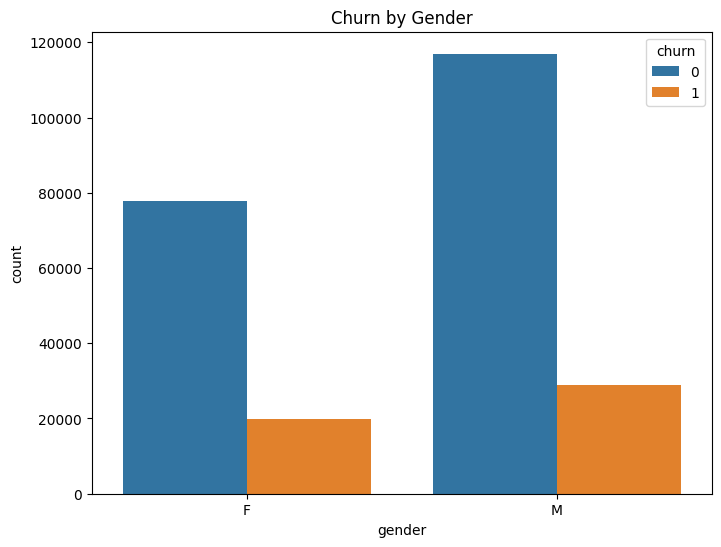

In [5]:
# Histograms for Numerical Features
plt.figure(figsize=(10, 8))
data[['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms for Numerical Features', fontsize=16)
plt.show()

# Boxplots for Numerical Features by Churn Status
plt.figure(figsize=(12, 10))
numerical_features = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Churn')
plt.tight_layout()
plt.show()

# Bar Plot for Gender and Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=data)
plt.title('Churn by Gender')
plt.show()


In [7]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['telecom_partner', 'gender', 'state', 'city'])

# Feature engineering: Calculate duration of subscription
data_encoded['subscription_duration'] = (pd.Timestamp.now() - data_encoded['date_of_registration']).dt.days

# Drop irrelevant columns
data_encoded.drop(columns=['customer_id', 'date_of_registration'], inplace=True)


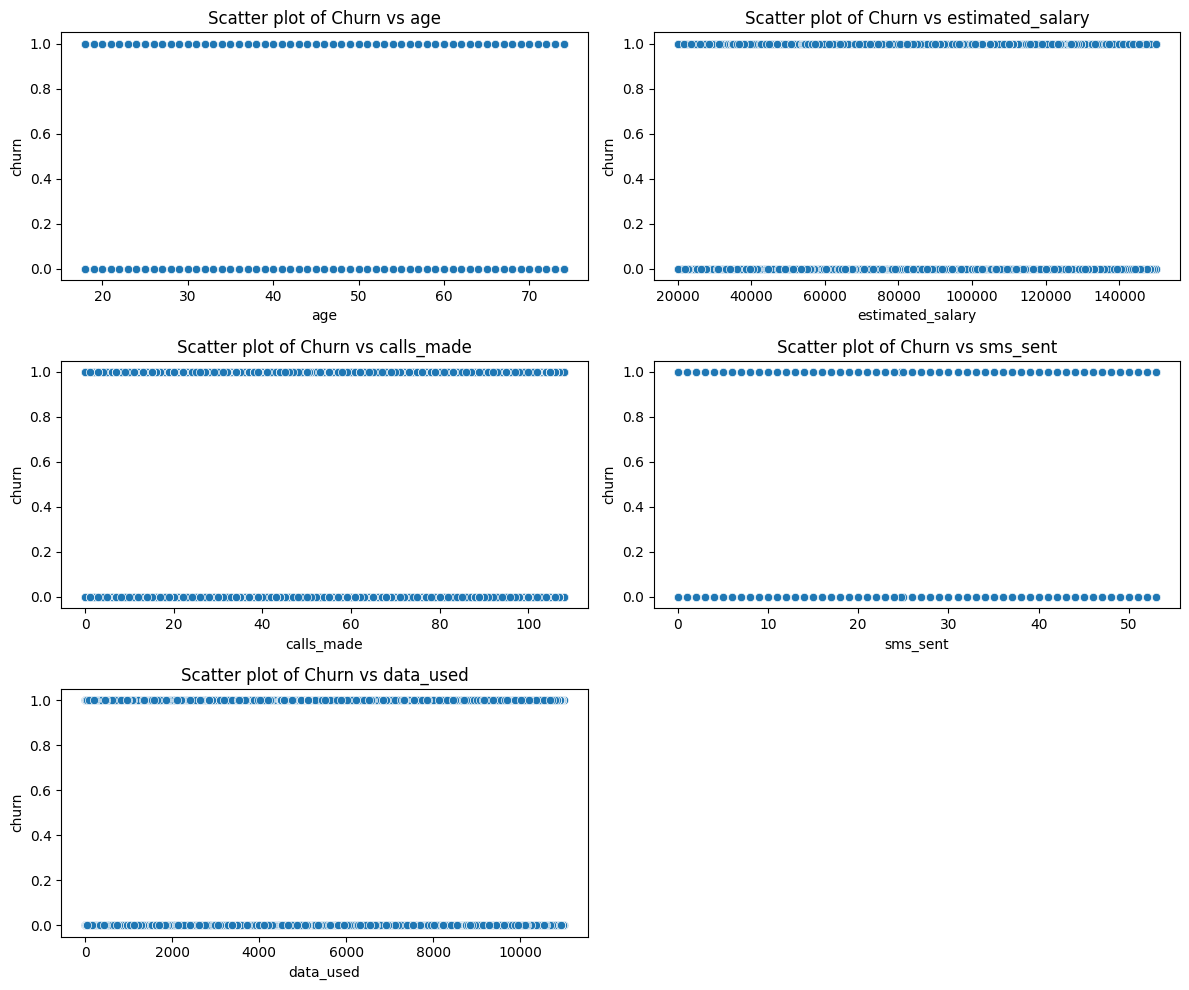

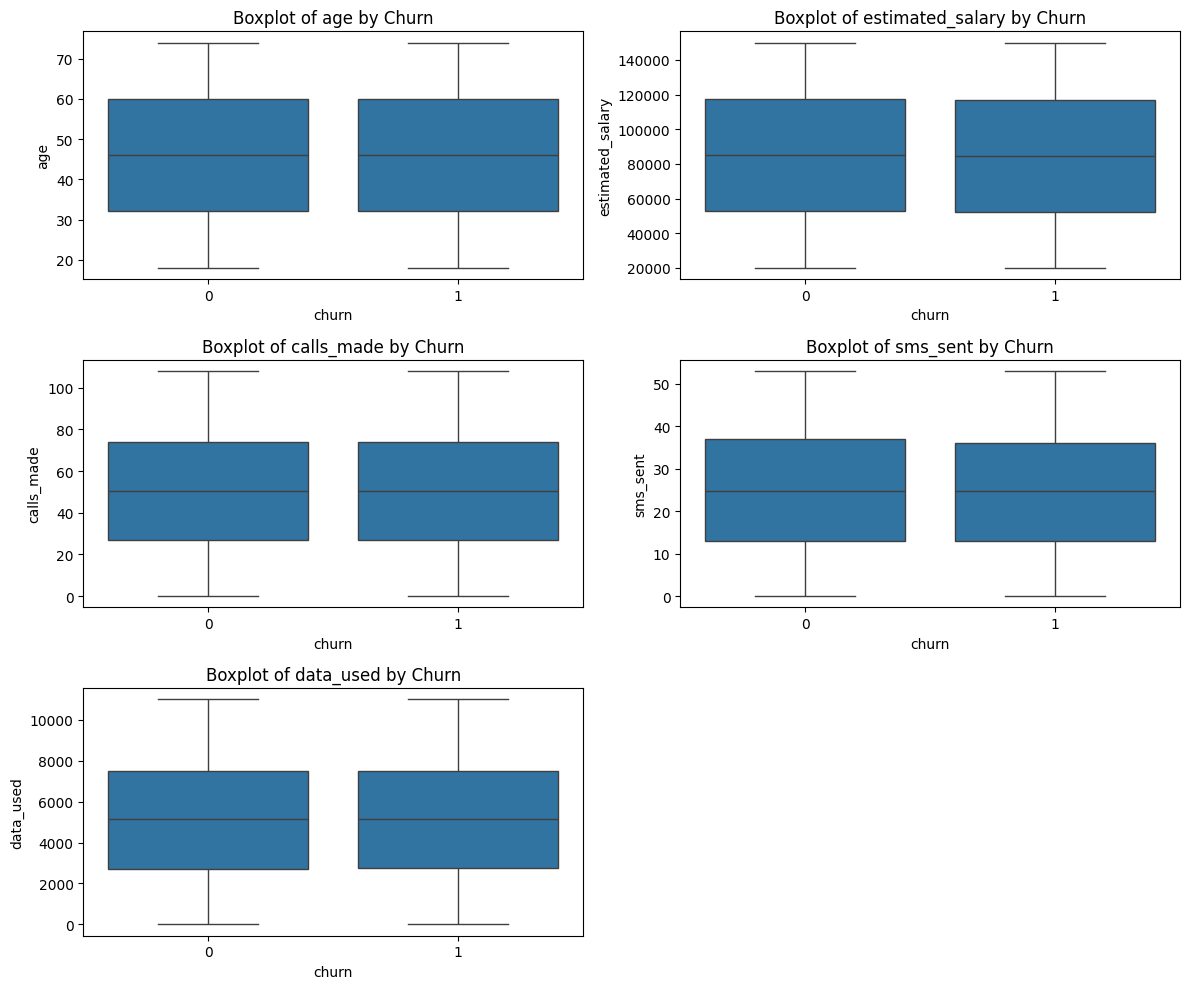

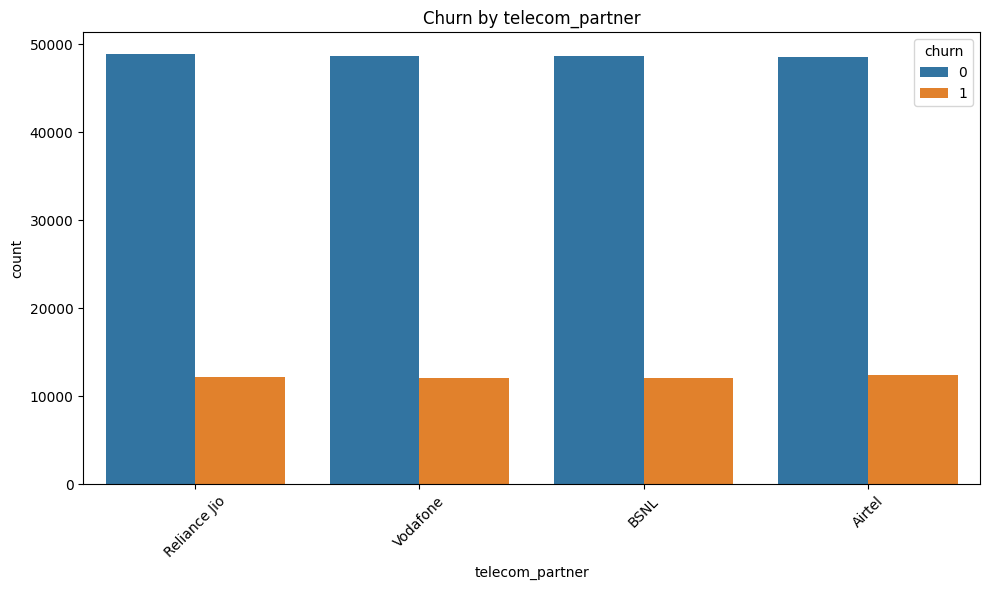

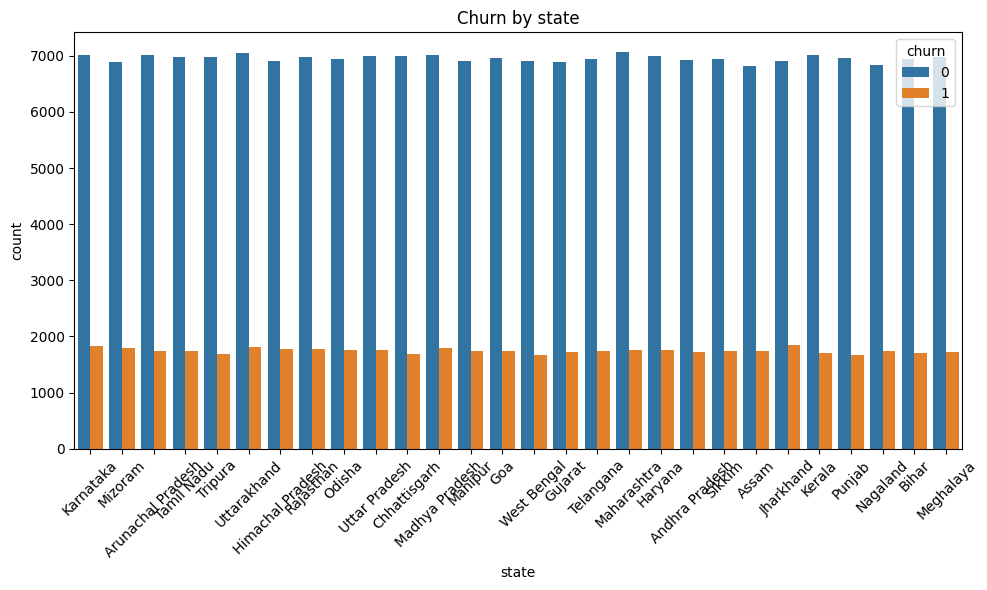

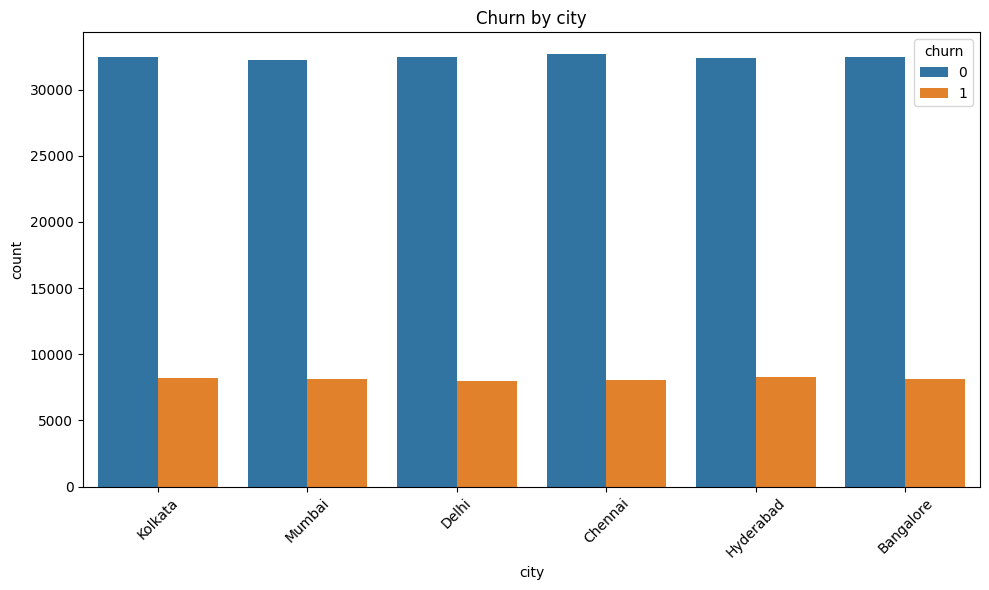

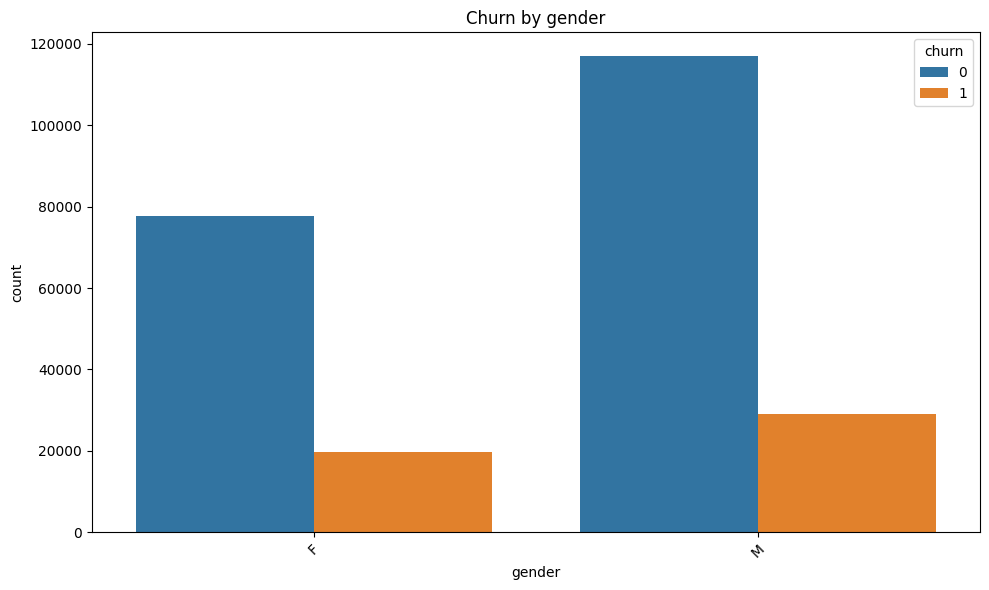

In [6]:
# Scatter plots for numerical features
plt.figure(figsize=(12, 10))
numerical_features = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=feature, y='churn', data=data)
    plt.title(f'Scatter plot of Churn vs {feature}')
plt.tight_layout()
plt.show()

# Box plots for numerical features by churn status
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Churn')
plt.tight_layout()
plt.show()

# Bar plots for categorical features
categorical_features = ['telecom_partner', 'state', 'city', 'gender']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='churn', data=data)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into features and target variable
X = data_encoded.drop(columns=['churn'])
y = data_encoded['churn']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7991418776046478
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711



In [10]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Example recommendations
print("Top factors influencing churn:")
print(feature_importance.head())

print("Recommendations:")
print("- Offer personalized promotions and discounts to retain high-risk customers.")
print("- Improve network coverage and service quality in areas with high churn rates.")
print("- Enhance customer support to address issues and concerns promptly.")


                         Feature  Importance
3               estimated_salary    0.112280
1                        pincode    0.112207
6                      data_used    0.111528
47         subscription_duration    0.110123
4                     calls_made    0.098543
5                       sms_sent    0.091591
0                            age    0.090553
2                 num_dependents    0.040629
10      telecom_partner_Vodafone    0.010283
9   telecom_partner_Reliance Jio    0.010212
8           telecom_partner_BSNL    0.010181
7         telecom_partner_Airtel    0.009404
41                city_Bangalore    0.009006
46                   city_Mumbai    0.008902
45                  city_Kolkata    0.008712
43                    city_Delhi    0.008456
12                      gender_M    0.008236
11                      gender_F    0.008145
42                  city_Chennai    0.007713
44                city_Hyderabad    0.006981
28               state_Meghalaya    0.004927
30        

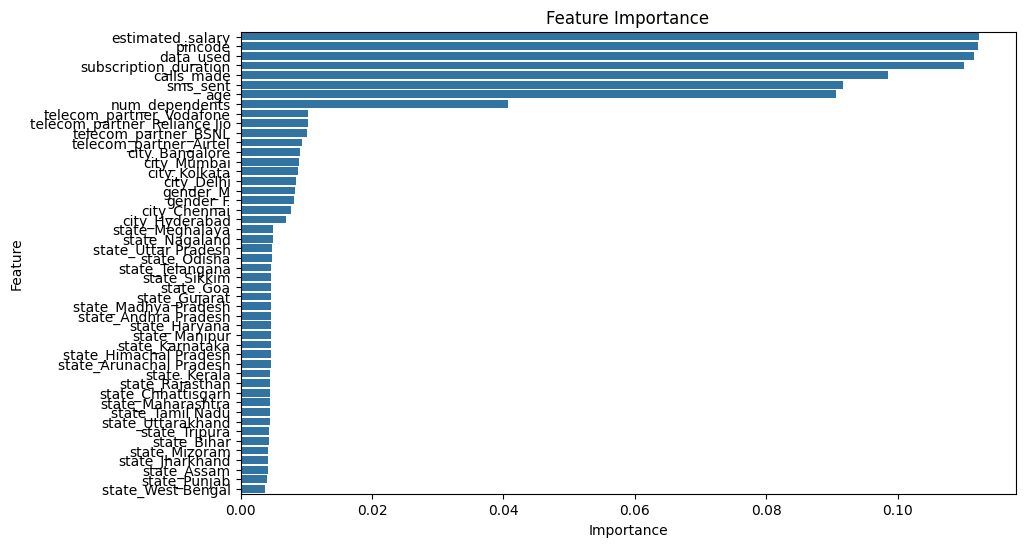

Selected Features: ['estimated_salary', 'pincode', 'data_used', 'subscription_duration', 'calls_made', 'sms_sent', 'age']
Gradient Boosting Feature Importance:
                          Feature    Importance
3               estimated_salary  1.954668e-01
1                        pincode  1.747331e-01
6                      data_used  1.442617e-01
47         subscription_duration  1.243174e-01
4                     calls_made  9.487197e-02
5                       sms_sent  6.342680e-02
0                            age  4.478623e-02
2                 num_dependents  1.477260e-02
24                  state_Kerala  1.152237e-02
40             state_West Bengal  1.076463e-02
42                  city_Chennai  9.918326e-03
22               state_Jharkhand  9.632862e-03
44                city_Hyderabad  8.166167e-03
38           state_Uttar Pradesh  7.788365e-03
7         telecom_partner_Airtel  6.704564e-03
35              state_Tamil Nadu  5.453082e-03
8           telecom_partner_BSNL  5.2442

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. Identify Threshold for Feature Selection
threshold = 0.05  # Example threshold
selected_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
print("Selected Features:", selected_features)

# 3. Perform Feature Engineering
# Example: Create a new feature by combining 'calls_made' and 'sms_sent'
data['interaction_feature'] = data['calls_made'] * data['sms_sent']

# 4. Compare Feature Importance Across Models
# Train a different model (e.g., Gradient Boosting Classifier)
# and compare feature importance
# Example:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model.feature_importances_})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)
print("Gradient Boosting Feature Importance:\n", gb_feature_importance)

